In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

In [2]:
## Calculate win or not win
## Parameter: MyStract ndarray, yourStrat ndarray
## Return win 1 or lose 0
def getScore(myStrat, yourStrat):
    myScore = 0
    yourScore = 0
    i = 0 
    while myScore < 20 and yourScore < 20 and i<10:
        if (myStrat[i] > yourStrat[i]):
            myScore += (i+1);
        if myStrat[i] < yourStrat[i]:
            yourScore += (i+1);
        i+=1
    if myScore >= 20:
        return 1
    if yourScore >= 20:
        return 0
    else:
        return 0

    
## Generate n random dirichlet
## Parameter: n strategies
## Return 2D np array
def makeStrat(alphas,n):
    strats = np.random.dirichlet(alphas,n)
    strats *= 100
    strats = np.rint(strats)
    adjust = 100 - np.sum(strats,axis=1)
    for i in range(n):
        strats[i,0] += adjust[i]
        np.random.shuffle(strats[i])
    return strats


## Calculate average win
## Parameter: MyStrat ndarray, testing ndarrays
## Return winning rate
def getMultiScore(myStrat, yourStrats):
    sum = 0
    for i in range(yourStrats.shape[0]):
        sum +=getScore(myStrat, yourStrats[i])
    return sum/yourStrats.shape[0]


## Get a neighbourhood o
def getNeighbourhood(x,n):
    xs = []
    for i in range(n):
        noise = np.random.randint(-2,2,size=9)
        y = x + np.append(noise,-np.sum(noise))
        if np.all(np.greater_equal(y,np.zeros(10))) and np.all(np.less_equal(y,np.ones(10)*100)):
            xs.append(y)
    return np.array(xs)

##
def update(x, ref):
    max = 0
    win = 0
    for i in range(x.shape[0]):
        if getMultiScore(x[i],ref) > win:
            max = x[i]
            win = getMultiScore(x[i],ref)
    return (max,win)

Processing 1 initial point:
   iteration: 0
   Converged!!
Processing 2 initial point:
   iteration: 0
   iteration: 50
   Converged!!
Processing 3 initial point:
   iteration: 0
   Converged!!
Processing 4 initial point:
   iteration: 0
   Converged!!
Processing 5 initial point:
   iteration: 0
   Converged!!
Processing 6 initial point:
   iteration: 0
   iteration: 50
   Converged!!
Processing 7 initial point:
   iteration: 0
   Converged!!
Processing 8 initial point:
   iteration: 0
   Converged!!
Processing 9 initial point:
   iteration: 0
   Converged!!
Processing 10 initial point:
   iteration: 0
   Converged!!
Processing 11 initial point:
   iteration: 0
   Converged!!
Processing 12 initial point:
   iteration: 0
   Converged!!
Processing 13 initial point:
   iteration: 0
   Converged!!
Processing 14 initial point:
   iteration: 0
   Converged!!
Processing 15 initial point:
   iteration: 0
   Converged!!
Processing 16 initial point:
   iteration: 0
   iteration: 50
   Converged!

   Converged!!
Processing 135 initial point:
   iteration: 0
   Converged!!
Processing 136 initial point:
   iteration: 0
   Converged!!
Processing 137 initial point:
   iteration: 0
   Converged!!
Processing 138 initial point:
   iteration: 0
   Converged!!
Processing 139 initial point:
   iteration: 0
   Converged!!
Processing 140 initial point:
   iteration: 0
   Converged!!
Processing 141 initial point:
   iteration: 0
   Converged!!
Processing 142 initial point:
   iteration: 0
   Converged!!
Processing 143 initial point:
   iteration: 0
   Converged!!
Processing 144 initial point:
   iteration: 0
   Converged!!
Processing 145 initial point:
   iteration: 0
   Converged!!
Processing 146 initial point:
   iteration: 0
   Converged!!
Processing 147 initial point:
   iteration: 0
   Converged!!
Processing 148 initial point:
   iteration: 0
   Converged!!
Processing 149 initial point:
   iteration: 0
   Converged!!
Processing 150 initial point:
   iteration: 0
   Converged!!
Processin

   Converged!!
Processing 266 initial point:
   iteration: 0
   Converged!!
Processing 267 initial point:
   iteration: 0
   Converged!!
Processing 268 initial point:
   iteration: 0
   Converged!!
Processing 269 initial point:
   iteration: 0
   Converged!!
Processing 270 initial point:
   iteration: 0
   Converged!!
Processing 271 initial point:
   iteration: 0
   Converged!!
Processing 272 initial point:
   iteration: 0
   Converged!!
Processing 273 initial point:
   iteration: 0
   Converged!!
Processing 274 initial point:
   iteration: 0
   Converged!!
Processing 275 initial point:
   iteration: 0
   iteration: 50
   Converged!!
Processing 276 initial point:
   iteration: 0
   Converged!!
Processing 277 initial point:
   iteration: 0
   Converged!!
Processing 278 initial point:
   iteration: 0
   Converged!!
Processing 279 initial point:
   iteration: 0
   Converged!!
Processing 280 initial point:
   iteration: 0
   Converged!!
Processing 281 initial point:
   iteration: 0
   Conv

   Converged!!
Processing 396 initial point:
   iteration: 0
   Converged!!
Processing 397 initial point:
   iteration: 0
   iteration: 50
   Converged!!
Processing 398 initial point:
   iteration: 0
   Converged!!
Processing 399 initial point:
   iteration: 0
   iteration: 50
   Converged!!
Processing 400 initial point:
   iteration: 0
   Converged!!


IndexError: list index out of range

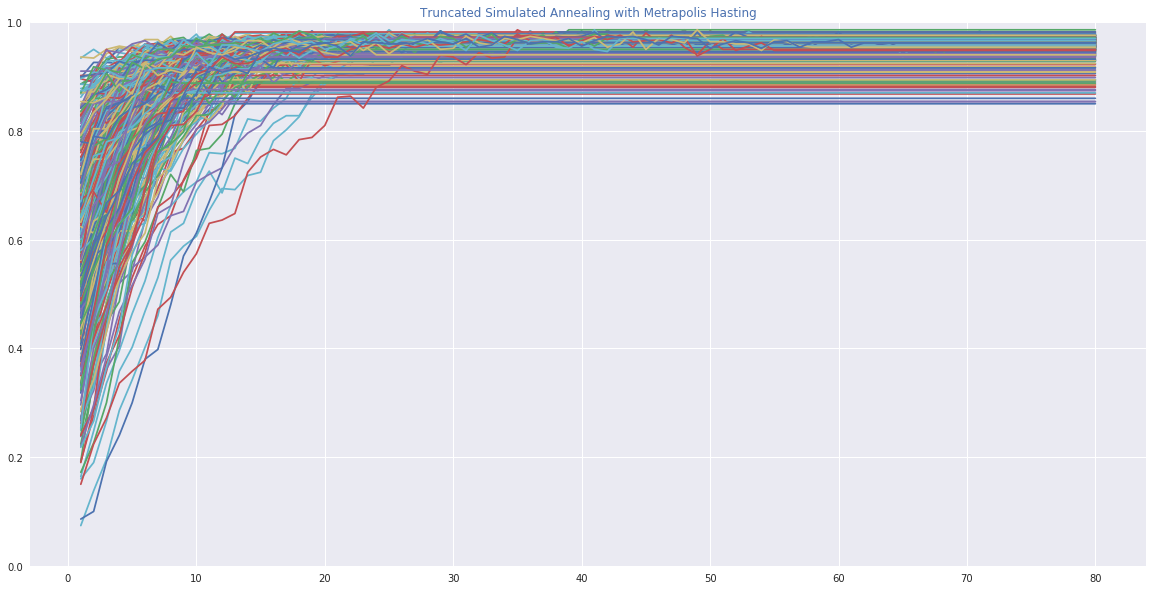

In [3]:
def main():
    myStrat = np.array([10,10,10,20,20,27,1,1,1,1])
    centroid = myStrat
    
    
    maxIter = 80
    numInitial = 1000
    refSize = 500
    stopThre = 5
    neighbourSize = 500
    mpl.style.use("seaborn")
    fig, ax = plt.subplots(figsize=(20, 10))
    ax.set_ylim([0, 1])
    ax.set_title('Truncated Simulated Annealing with Metrapolis Hasting'.format("seaborn"), color='C0')   

    
    x = makeStrat([1,1,1,1,1,1,1,1,1,1],numInitial)
    strats = []
    wins = []
    for j in range(numInitial):
        converge = False
        good = False
        print("Processing",j+1,"initial point:")
        centroid = x[j]
        win = []
        for i in range(maxIter):
            if i% 50 == 0:
                print("   iteration:",i)
            neigh = getNeighbourhood(centroid, neighbourSize)
            ref = makeStrat([1,1,1,1,1,1,1,1,1,1],refSize)
            inter = update(neigh,ref)

            ## Convergence check
            if np.sum(np.abs(centroid- inter[0])) < stopThre:
                print("   Converged!!")
                converge = True
                break
                
            centroid = inter[0]
            win.append(inter[1])
        
        ## Reject or Accept sample solution
        if win[-1] >= 0.85:
            good = True
            
        if good and converge:
        ## Reject or Accept sample Solution
            strats.append(centroid)
            pd.DataFrame(np.array(strats)).to_csv("computationalApproachCentroids.csv",header=None, index=None)

        ## Make or not make solution plot
            win = np.concatenate((np.array(win),np.ones(maxIter-len(win))*win[-1]), axis = 0)
            wins.append(win)
            ax.plot([i+1 for i in range(len(win))],  win)
        
    ## Threshold line
    ax.plot([i+1 for i in range(len(win))],  [0.85 for i in range(len(win))], linestyle = '--', color = "yellow")
        
    ## Show the plot, save the plot
    plt.show() 
    fig.savefig('computationalApproach.jpg')
        
if __name__== "__main__":
    main()


